In [172]:
import pandas as pd
import numpy as np
import feather
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib as mpl
mpl.use('nbAgg')
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [173]:
pingfInfoFilePath = './dv_uex_190401_filtrado_personas_clean'
dv_uex_190401_filtrado_personas_clean = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_uex_190401_filtrado_personas_clean.head()

,id,tipo_studio,titulacion,dni,sexo,fnac,municipio_familiar,tipo_acceso,subtipo_acceso,num_estudios,fecha_inicio,fecha_fin,edad_fin,duracion_studio,curso_inicio,curso_fin,total
0,36957,Grado,GRADO EN EDUCACIÓN PRIMARIA,19a9b555a1c6b860c9c68039d1a3ff9d36a49ec3c2b67e...,M,1993-03-27,SALVALEÓN,Selectividad,LOE (Grados),2,2011-01-09,2014-01-08,21,3,2011-12,2014-15,1
1,37041,Grado,GRADO EN EDUCACIÓN PRIMARIA,8adf6e032c747e87ffcd7ac9ccf885d653c6b689071f9a...,M,2000-07-08,ALDEA DEL CANO,Selectividad,LOE (Grados),1,2012-01-09,2014-01-08,26,2,2012-13,2014-15,1
2,24088,Primer y segundo ciclo,ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. C...,73a526034466484b0e207f81f45b455d844822bf20442e...,M,1988-09-08,BADAJOZ,Selectividad,LOGSE,1,2006-01-09,2011-01-08,23,5,2006-07,2011-12,1
3,29263,Primer y segundo ciclo,INGENIERO QUÍMICO,2fa7d47d08dea2cc0b6deb109d0fa0964ac0093f40ec46...,M,1989-09-14,MONTIJO,Selectividad,LOGSE,1,2007-01-09,2012-01-08,23,5,2007-08,2012-13,1
4,5679,Primer y segundo ciclo,INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EX...,74477b74079d34e19f4a3d4a1b6e5bbdd6bd3ac1e77fab...,M,1982-12-26,TRUJILLO,Selectividad,Otros (sin especificar),2,2002-01-09,2007-01-08,25,5,2002-03,2007-08,1


In [174]:
pingfInfoFilePath = './dv_historial_contratos_190411_clean'
dv_historial_contratos_190411_clean = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_historial_contratos_190411_clean.head()

,dni,cod_tipo,descripcion,fecha_inicio,fecha_fin,tipologia,cno_cod,cno_desc,actividad_economica_cod,actividad_economica_desc,seccion_economica,sector,localidad_cod,famprof_id,id,duracion_contrato_dias,total,estudios,edad_inicio_contrato
0,e84f231536b1ad08b01ff8506ff2317bf0c2c460b02fa8...,402,EVENTUAL A TIEMPO COMPLETO CIRCUNSTANCIAS DE L...,2010-07-25,2010-07-25,TEMPORAL,2630,TECNICOS DE EMPRESAS Y ACTIVIDADES TURISTICAS,77,Actividades de alquiler,ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXILI...,SERVICIOS,6015.0,FCO,103833,1.0,1,t,31
1,28c55e81e8ac34e4ce37fc04d4a519822969e9dc0de41b...,502,EVENTUAL A TIEMPO PARCIAL CIRCUNSTANCIAS DE LA...,2017-11-28,2017-11-28,TEMPORAL,5824,AZAFATOS DE TIERRA,78,Actividades relacionadas con el empleo,ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXILI...,SERVICIOS,6015.0,FCO,499104,1.0,1,t,23
2,03dda4db89262c831360c859cd18b68b2b44ba7e3c3806...,402,EVENTUAL A TIEMPO COMPLETO CIRCUNSTANCIAS DE L...,2006-03-28,2006-03-28,TEMPORAL,5824,AZAFATOS DE TIERRA,52,Almacenamiento y actividades anexas al transporte,TRANSPORTE Y ALMACENAMIENTO,SERVICIOS,6015.0,FCO,455531,1.0,1,t,22
3,9b91cc5cd1b11d613160c96159a1a5d3d6eba44052a656...,502,EVENTUAL A TIEMPO PARCIAL CIRCUNSTANCIAS DE LA...,2017-03-26,2017-03-26,TEMPORAL,5120,CAMAREROS ASALARIADOS,56,Servicios de comidas y bebidas,HOSTELERÍA,SERVICIOS,6015.0,HOT,243872,1.0,1,t,25
4,ea980973d9987081ee700a7ea8d241ef8eb36e3abe767b...,502,EVENTUAL A TIEMPO PARCIAL CIRCUNSTANCIAS DE LA...,2016-06-05,2016-06-05,TEMPORAL,5120,CAMAREROS ASALARIADOS,56,Servicios de comidas y bebidas,HOSTELERÍA,SERVICIOS,10139.0,HOT,364314,1.0,1,t,23


In [175]:
pingfInfoFilePath = './dv_erasmus_180108_2005a2012_filtrado_persona_clean'
dv_erasmus_180108_2005a2012_filtrado_persona_clean = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_erasmus_180108_2005a2012_filtrado_persona_clean.head()

,id,curso,dni,edad,sexo,nacionalidad,area_estudio,titulacion,nivel_estudio,anos_estudio_previo_erasmus,...,practicas_duracion_meses,practicas_comienzo_mes,practicas_num_creditos_ects,practicas_beca,aprendizaje_idioma_anfitrion,idioma_de_formacion_recibida,participacion_previa_erasmus,cualificacion_obtenida_en_pais_acogida,pais_destino,total
0,1271,2008/2009,2a35e7f13bdc6ea7a04b251463adceb86ca3d77d57dc23...,22,H,ES,"723 - Enfermería, obstetricia y fisioterapia",DIPLOMADO EN ENFERMERIA,1D - Diplomatura,2.0,...,NaN,NaN,NaN,NaN,S,IT,N,N,IT - Italy,1
1,1993,2010/2011,491fc9b9628d9f43fb1e27960707dcb0ed7bbd3b3e066a...,20,H,ES,6 - Agricultura y veterinaria,INGENIERO AGRONOMO,1L - Licenciatura,3.0,...,NaN,NaN,NaN,NaN,S,PT,N,N,PT - Portugal,1
2,2489,2011/2012,7ba6ff8737892c3c68870ff9dd6fa626866a9ab97ca326...,21,M,ES,524 - Química y procesos,INGENIERO QUIMICO,1L - Licenciatura,4.0,...,NaN,NaN,NaN,NaN,S,IT,N,O,IT - Italy,1
3,1382,2009/2010,ed88535b7d9c133936ac4f096578eaf10d9b64a3cfc118...,20,M,ES,314 - Economía,LICENCIADO EN ECONOMIA,1L - Licenciatura,3.0,...,NaN,NaN,NaN,NaN,S,IT,N,N,IT - Italy,1
4,1253,2008/2009,64bed883fa25ed89bd7b810be60ca5f3f6559700f475fd...,20,M,ES,21 - Artes,LICENCIADO EN HISTORIA DEL ARTE,1L - Licenciatura,3.0,...,NaN,NaN,NaN,NaN,S,IT,N,N,IT - Italy,1


In [176]:
pingfInfoFilePath = './dv_idiomas_190411'
dv_idiomas_190411 = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_idiomas_190411.head()

,dni,idioma,ano_estudio,id
0,8a75a56fc482cecccfbb89c2abb62a48518be7dc812553...,Inglés,2009,5
1,722ebb88df30735c6d6e0c77500af2832276b7f8c43566...,Inglés,2014,8
2,9ebf83f4e7ac99fecb1d8822030462ba13ca2e727106b4...,Inglés,2014,11
3,17ba2d93e41e3ebcd71f2137e4ef0bef950576ba3edc8e...,Inglés,2016,12
4,33ce3b19da97c9bb7537a5ad12afbb1415c947db9bb293...,Inglés,2016,26


In [177]:
pingfInfoFilePath = './dv_personas_190411_previo_linear_regression'
dv_personas_190411_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Procedemos a obtener las dummies de sexo, tipo_acceso y tipo_erasmus

In [178]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [179]:
dv_personas_190411_model_one_hot = pd.get_dummies(data=dv_personas_190411_model,columns=categoricalCols)

In [180]:
dv_personas_190411_model_one_hot.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [181]:
dv_personas_190411_model_one_hot.drop(['dni'],axis=1,inplace = True)

### Comenzamos con el primer proceso de Regresión Lineal

In [182]:
dv_personas_190411_model_one_hot_scaler = preprocessing.MinMaxScaler().fit_transform(dv_personas_190411_model_one_hot)
dv_personas_190411_model_one_hot_scaler = pd.DataFrame(dv_personas_190411_model_one_hot_scaler,columns=dv_personas_190411_model_one_hot.columns)
dv_personas_190411_model_one_hot_scaler.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,Titulacion_is_DIPLOMADO EN TERAPIA OCUPACIONAL,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,0.30,0.131313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.28,0.656566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.26,0.232323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.32,0.414141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.36,0.414141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [183]:
Features_1_2 = dv_personas_190411_model_one_hot_scaler.iloc[:,0:1]
Features_2_2 = dv_personas_190411_model_one_hot_scaler.iloc[:,2:]
labels = dv_personas_190411_model_one_hot_scaler['tto_pcto_dias_trabajados']

In [184]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[0.3 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 

In [185]:
Features.shape

(14715, 204)

In [186]:
labels = np.array(labels)
labels[:10]

array([0.13131313, 0.65656566, 0.23232323, 0.41414141, 0.41414141,
       0.12121212, 0.17171717, 0.78787879, 0.17171717, 0.48484848])

In [187]:
labels.shape

(14715,)

Probamos con 80% para entrenamiento y 20% para las pruebas

In [188]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 2943)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [189]:
x_train.shape

(11772, 204)

In [190]:
x_test.shape

(2943, 204)

In [191]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [192]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 3.18757455e-01 -5.14900425e-02 -5.19558258e-02  5.20051980e-02
 -1.73521633e-02 -3.31336508e-02  7.10994305e-02 -2.66270372e-02
 -3.22478457e-02 -5.05030719e-02  2.18908179e-02 -3.99037928e-02
  3.06820350e-03  2.90712007e-02  9.84022382e-03 -3.22363257e-02
 -5.88238877e-02 -4.44629514e-02  2.79295005e-02 -7.25593171e-02
 -4.85357075e-02 -1.08991580e-01 -4.89912000e-02 -2.09438243e-02
 -9.84480437e-02  1.13022465e-01 -1.59635381e-02 -8.61452025e-02
 -8.53827674e-02  2.85058388e-02 -6.99740623e-02  2.30330245e-02
  2.18864128e-02 -4.12974828e-02 -6.61881512e-02  6.33031843e-02
 -3.71477136e-02 -9.10068403e-02  5.45076809e-02  8.02260079e-03
  4.38667936e-03 -4.82122478e-02  4.01649934e-02  1.37222593e-03
 -2.34692014e-02  2.32110652e-02 -7.05519066e-03  7.69291014e-03
  2.52938289e-02  4.78671245e-02 -1.49818363e-02  1.54945697e-02
 -2.38623830e-02  8.92373547e-02 -1.27942462e-01  1.19358825e-02
 -7.49599329e-02 -8.80183501e-02  2.29619311e-02  4.96500831e-02
 -7.50987396e-03 -1.2

In [193]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)  

Mean Square Error      = 0.04404348610228222
Root Mean Square Error = 0.209865399964554
Mean Absolute Error    = 0.1696227090807614
Median Absolute Error  = 0.15022586090396148
R^2                    = 0.10376217099989071
Adjusted R^2           = 0.09546082575700805


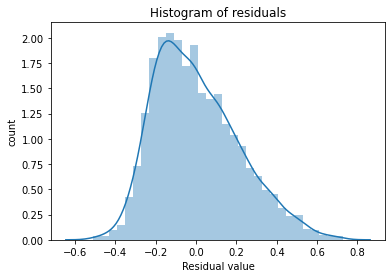

In [194]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

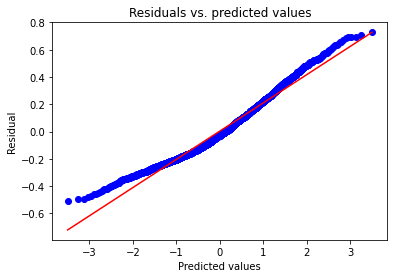

In [195]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

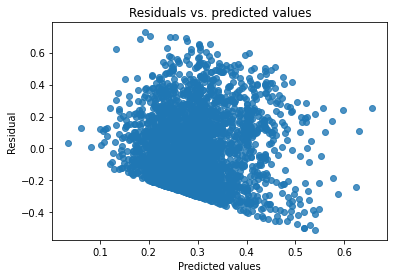

In [196]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

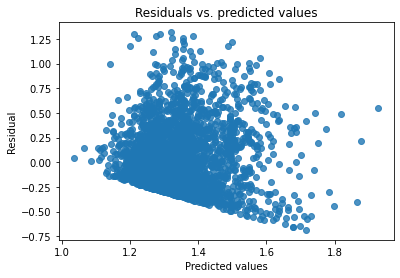

In [197]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 

#### Procedo a eliminar la característica "tipo_erasmus" y vuelvo a probar:

### Comenzamos con el segundo proceso de Regresión Lineal

In [198]:
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,22,65.0,000e88e4e0244e5317dc105c2f77fdfde83fa66a60c813...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
dv_personas_190411_model_2 = dv_personas_190411_model.copy()
dv_personas_190411_model_2.drop(['tipo_erasmus'],axis=1,inplace = True) 
dv_personas_190411_model_2.drop(['dni'],axis=1,inplace = True) 

In [200]:
categoricalCols = ['sexo','tipo_acceso']

In [201]:
dv_personas_190411_model_2_one_hot = pd.get_dummies(data=dv_personas_190411_model_2,columns=categoricalCols)

In [202]:
dv_personas_190411_model_2_one_hot.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,Titulacion_is_DIPLOMADO EN TERAPIA OCUPACIONAL,...,tipo_acceso_ACCESO DOCTORADO (RD 99/2011),tipo_acceso_Acceso a Segundo Ciclo,tipo_acceso_COU sin selectividad,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario
0,23,13.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,65.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,21,23.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,24,41.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,26,41.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [203]:
dv_personas_190411_model_2_one_hot_scaler = preprocessing.MinMaxScaler().fit_transform(dv_personas_190411_model_2_one_hot)
dv_personas_190411_model_2_one_hot_scaler = pd.DataFrame(dv_personas_190411_model_2_one_hot_scaler,columns=dv_personas_190411_model_2_one_hot.columns)
dv_personas_190411_model_2_one_hot_scaler.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,Titulacion_is_DIPLOMADO EN TERAPIA OCUPACIONAL,...,tipo_acceso_ACCESO DOCTORADO (RD 99/2011),tipo_acceso_Acceso a Segundo Ciclo,tipo_acceso_COU sin selectividad,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario
0,0.30,0.131313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.28,0.656566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.26,0.232323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.32,0.414141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.36,0.414141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
Features_1_2 = dv_personas_190411_model_2_one_hot_scaler.iloc[:,0:1]
Features_2_2 = dv_personas_190411_model_2_one_hot_scaler.iloc[:,2:]
labels = dv_personas_190411_model_2_one_hot_scaler['tto_pcto_dias_trabajados']

In [205]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[0.3 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 

In [206]:
Features.shape

(14715, 201)

In [207]:
labels = np.array(labels)
labels[:10]

array([0.13131313, 0.65656566, 0.23232323, 0.41414141, 0.41414141,
       0.12121212, 0.17171717, 0.78787879, 0.17171717, 0.48484848])

In [208]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 3679)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [209]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [210]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 3.10713631e-01 -5.59986889e-02 -5.88537708e-02  5.42605284e-02
 -3.88092337e-02 -3.16512239e-02  6.83606113e-02 -2.45646869e-02
 -4.09371006e-02 -6.11189793e-02  2.01460372e-02 -5.17135039e-02
 -8.46852567e-04  3.04010146e-02  1.32599855e-02 -4.74459564e-02
 -5.95727160e-02 -5.96819082e-02  1.91013422e-02 -6.73328270e-02
 -5.03096001e-02 -1.27683234e-01 -6.11903633e-02 -2.47645081e-02
 -8.97369215e-02  1.07239198e-01 -2.29072062e-02 -8.92847149e-02
 -8.33194092e-02  3.05960664e-02 -7.13020870e-02  2.15778313e-02
  1.88529029e-02 -3.63227696e-02 -6.29991612e-02  4.57398313e-02
 -4.87816766e-02 -9.75714090e-02  5.23536677e-02 -4.19436822e-04
  3.20503537e-03 -5.69718286e-02  4.12796682e-02 -1.57553914e-03
 -1.69874821e-02  2.24243918e-02 -5.03848897e-03  4.15429472e-03
  1.87513642e-02  5.16721553e-02 -1.45236448e-02  1.21202153e-02
 -3.12929951e-02  1.03736336e-01 -1.32058171e-01  1.07740962e-03
 -7.51892659e-02 -9.67464871e-02  2.62382860e-02  5.28955440e-02
  5.71887092e-03 -1.2

In [211]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)  

Mean Square Error      = 0.0442995511249842
Root Mean Square Error = 0.21047458546101047
Mean Absolute Error    = 0.16965709655322098
Median Absolute Error  = 0.15073155875157826
R^2                    = 0.09358216468534675
Adjusted R^2           = 0.0868789925260765


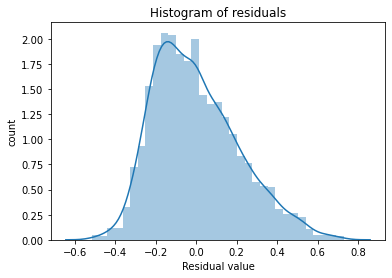

In [212]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

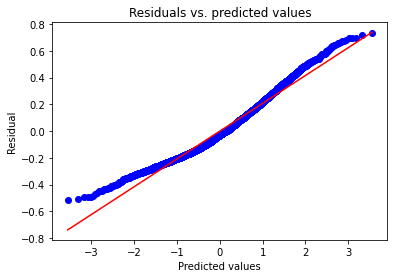

In [213]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

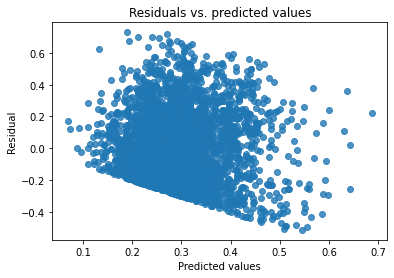

In [214]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

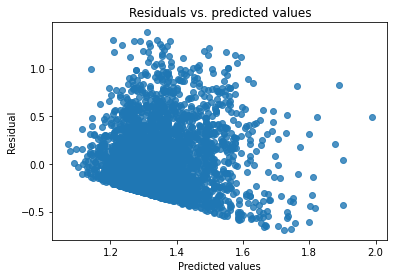

In [215]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 

 #### El resultado obtenido es peor que el anterior por lo que nos quedamos con el anterior

#### Procedemos a otro el proceso de Regresión Lineal, pero esta vez en un dataframe con la característica del orden de preinscripción incluida

In [216]:
pingfInfoFilePath = './dv_personas_190411_previo_linear_regression_orden_pr'
dv_personas_190411_ordenPr_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_ordenPr_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Formación Profesional,Ninguno,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Acceso a Segundo Ciclo,Ninguno,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Selectividad,Ninguno,26,17.0,0035fa6215f1a2430aef6cf1c63a6116a313c456b4ae6b...,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [218]:
dv_personas_190411_ordenPr_model_one_hot = pd.get_dummies(data=dv_personas_190411_ordenPr_model,columns=categoricalCols)

In [219]:
dv_personas_190411_ordenPr_model_one_hot.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,23,13.0,000b4ece399af8f6c90ad84acccc1aaea09d88ea83ac1c...,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,24,41.0,001d295ef6bbd65b0fb84c496ff81d6e9f2381e819289b...,1.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,26,41.0,00230081e3257d2dd7d77d7722ce78b85545135946ed2e...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,26,17.0,0035fa6215f1a2430aef6cf1c63a6116a313c456b4ae6b...,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [220]:
dv_personas_190411_ordenPr_model_one_hot.drop(['dni'],axis=1,inplace = True)

### Comenzamos con el tercer proceso de Regresión Lineal


In [221]:
dv_personas_190411_ordenPr_model_one_hot_scaler = preprocessing.MinMaxScaler().fit_transform(dv_personas_190411_ordenPr_model_one_hot)
dv_personas_190411_ordenPr_model_one_hot_scaler = pd.DataFrame(dv_personas_190411_ordenPr_model_one_hot_scaler,columns=dv_personas_190411_ordenPr_model_one_hot.columns)
dv_personas_190411_ordenPr_model_one_hot_scaler.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,0.312500,0.131313,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.270833,0.232323,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.333333,0.414141,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.375000,0.414141,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.375000,0.171717,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [222]:
Features_1_2 = dv_personas_190411_ordenPr_model_one_hot_scaler.iloc[:,0:1]
Features_2_2 = dv_personas_190411_ordenPr_model_one_hot_scaler.iloc[:,2:]
labels = dv_personas_190411_ordenPr_model_one_hot_scaler['tto_pcto_dias_trabajados']

In [223]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[0.3125    , 0.14285714, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [224]:
labels = np.array(labels)
labels[:10]

array([0.13131313, 0.23232323, 0.41414141, 0.41414141, 0.17171717,
       0.17171717, 0.48484848, 0.90909091, 0.1010101 , 0.05050505])

In [225]:
labels.shape

(9416,)

In [226]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 2354)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [227]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 2.14783078e-01  2.59677854e-03 -8.00547726e-02 -1.03920583e-01
 -3.49298065e-02 -3.35616872e-02 -6.40872174e-02  4.82542409e-02
 -6.00595309e-02 -3.82327845e-02 -2.88334312e-03  2.33754334e-02
 -6.54325251e-02 -2.38406167e-02 -1.39459492e-02  1.54231758e-02
 -9.57278282e-02 -2.19518195e-02 -8.97936610e-02 -2.30622425e-02
 -1.30333795e-01 -6.54914023e-02 -8.07171249e-02 -4.24232682e-02
 -4.84571591e-02 -1.47708496e-01  1.06461894e-01 -3.54348058e-02
 -1.42848414e-01 -1.13676548e-01  1.43459897e-02 -1.02194701e-01
 -4.83637826e-03  3.36442314e-02 -5.76741630e-02 -1.12569750e-01
  5.60714909e-02 -6.54405262e-02 -1.33142452e-01  2.05762714e-02
 -2.38364364e-02 -7.68142907e-03 -8.65488825e-02 -1.72729725e-02
 -2.47454555e-02 -8.92158858e-02  1.58817382e-02 -7.61395222e-03
  1.53754940e-02 -6.48290295e-03  2.03562583e-02 -2.93257577e-02
 -2.85266634e-02 -7.62215306e-02  8.78623675e-03 -1.45952042e-01
  1.80369788e-02 -1.16496516e-01 -1.85968286e-01  8.28406608e-03
  4.79167845e-02  5.1

In [228]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28) 

Mean Square Error      = 0.036219777491838384
Root Mean Square Error = 0.1903149429021231
Mean Absolute Error    = 0.15234864814261617
Median Absolute Error  = 0.13367272871448713
R^2                    = 0.10025357205216057
Adjusted R^2           = 0.08980939597537997


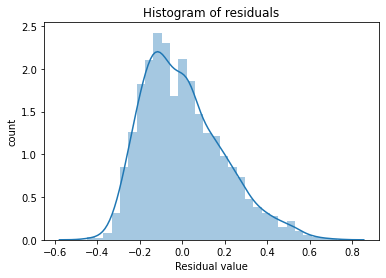

In [229]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)   

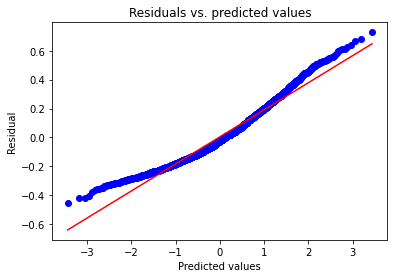

In [230]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

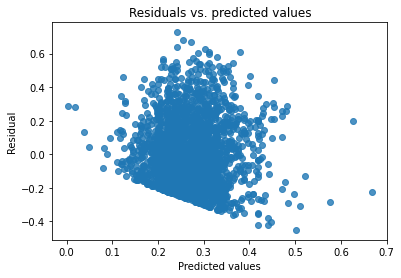

In [231]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

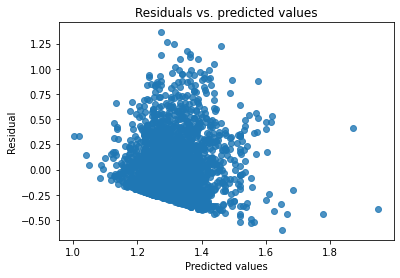

In [232]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 

#### El análisis resultante con el orden de preinscripción ha resultado ser mejor que el primero que realizamos, hemos mejorado el MSE y aumentado un poco el r2

#### Procedemos a continuación a hacer un análisis por los diferentes tipos de estudios que existen (Grado, Máster, Doctorado, Primer y Segundo Ciclo), el primero en realizarse va a ser el de aquellas personas que hayan cursado una titulación de grado:

In [238]:
pingfInfoFilePath = './dv_personas_190411_previo_linear_regression_grado'
dv_personas_190411_grado_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_grado_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,5,4.0,74d67dddf6a90800fdf40329e9dae1893a13ea312b3514...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,22,4,10.0,0e10eb72af9e98758e907e131e37cefe87830eadacbd77...,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,M,Selectividad,Ninguno,22,3,12.0,12cfa2295bc34eaf61197e1f9a141386e9ae1d8da3a945...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Selectividad,Ninguno,22,4,4.0,0902258057c0676ec136e6c44078d49aa141bfc9304fa1...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Selectividad,Ninguno,24,6,60.0,5caa652eaf2acd14fb6103ada1a0422d5aa61652abf374...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Procedemos a obtener las dummies de sexo, tipo_acceso y tipo_erasmus y eliminamos para este primer proceso independiente por tipo de titulación, el orden de preinscripción


In [239]:
dv_personas_190411_grado_model.drop(['orden_preinscripcion'],axis=1,inplace = True)

In [240]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [241]:
dv_personas_190411_grado_model_one_hot = pd.get_dummies(data=dv_personas_190411_grado_model,columns=categoricalCols)

In [242]:
dv_personas_190411_grado_model_one_hot.head()

,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),...,tipo_acceso_COU sin selectividad,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,23,5,4.0,74d67dddf6a90800fdf40329e9dae1893a13ea312b3514...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,22,4,10.0,0e10eb72af9e98758e907e131e37cefe87830eadacbd77...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,22,3,12.0,12cfa2295bc34eaf61197e1f9a141386e9ae1d8da3a945...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,22,4,4.0,0902258057c0676ec136e6c44078d49aa141bfc9304fa1...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,24,6,60.0,5caa652eaf2acd14fb6103ada1a0422d5aa61652abf374...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [243]:
dv_personas_190411_grado_model_one_hot.drop(['dni'],axis=1,inplace = True)

In [244]:
dv_personas_190411_grado_model_one_hot.dropna(axis = 0, inplace = True)

### Comenzamos con el primer proceso Regresión Lineal para el tipo de titulación de Grado

In [245]:
dv_personas_190411_grado_model_one_hot.head()

,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,...,tipo_acceso_COU sin selectividad,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,23,5,4.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,22,4,10.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,22,3,12.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,22,4,4.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,24,6,60.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [246]:
dv_personas_190411_grado_model_one_hot_scaler = preprocessing.MinMaxScaler().fit_transform(dv_personas_190411_grado_model_one_hot)
dv_personas_190411_grado_model_one_hot_scaler = pd.DataFrame(dv_personas_190411_grado_model_one_hot_scaler,columns=dv_personas_190411_grado_model_one_hot.columns)
dv_personas_190411_grado_model_one_hot_scaler.head()

,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,...,tipo_acceso_COU sin selectividad,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,0.250000,0.129032,0.040404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.227273,0.096774,0.101010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.227273,0.064516,0.121212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.227273,0.096774,0.040404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.272727,0.161290,0.606061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [247]:
dv_personas_190411_grado_model_one_hot_scaler.iloc[:,0:2]

,edad_fin_primera_titulacion,duracion_studio
0,0.250000,0.129032
1,0.227273,0.096774
2,0.227273,0.064516
3,0.227273,0.096774
4,0.272727,0.161290
...,...,...
6671,0.204545,0.064516
6672,0.227273,0.096774
6673,0.318182,0.161290
6674,0.227273,0.064516


In [248]:
Features_1_2 = dv_personas_190411_grado_model_one_hot_scaler.iloc[:,0:2]
Features_2_2 = dv_personas_190411_grado_model_one_hot_scaler.iloc[:,3:]
labels = dv_personas_190411_grado_model_one_hot_scaler['tto_pcto_dias_trabajados']

In [249]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[0.25      , 0.12903226, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [250]:
labels = np.array(labels)
labels[:10]

array([0.04040404, 0.1010101 , 0.12121212, 0.04040404, 0.60606061,
       0.25252525, 0.23232323, 0.33333333, 0.24242424, 0.44444444])

In [251]:
labels.shape

(6676,)

70-30

In [252]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 667)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [253]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 1.37105678e-01  3.45953783e-01 -8.84680459e-02 -1.14899701e-02
  3.07470169e-02 -6.48869494e-02 -8.45131464e-02  1.43353765e-02
  1.88152642e-02 -5.83500383e-02  1.05099969e-01  8.46368856e-02
  1.97884669e+09  5.03313304e-02  1.19641688e-01 -1.45746535e-01
  1.29976950e-01 -5.60491205e-02 -4.36747873e-02  3.26491426e-02
  5.83087558e+08 -8.54616669e-02 -2.84759967e-01 -1.22805161e+08
  1.32057423e-01 -1.43968820e-01  3.85654276e+07 -4.54646020e-02
 -1.41714569e-02 -2.18486351e+07  2.39499282e-01 -1.14521150e-01
  2.51024729e-02  1.46585627e-01 -1.19614627e-01 -1.21896102e-01
  7.19477858e-02  2.41429137e-01 -1.48166917e-01 -2.10804730e-01
 -1.00405093e-01 -5.97673495e-02 -7.96074188e-02  1.19395669e-01
  6.24846349e+07 -9.01531073e+07 -7.41805567e-02  3.27093399e-02
 -5.19130411e-02  6.19929010e+06  5.88379740e-02  2.19973740e-02
  2.03100765e+06  1.15585836e-01  6.81448170e-02  1.70679848e+06
  2.10882425e-01 -9.48813481e-02  1.14186767e+06 -1.46396183e-02
 -1.02021212e-01  4.6

In [254]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)  

Mean Square Error      = 509731785922534.4
Root Mean Square Error = 22577240.44081859
Mean Absolute Error    = 874194.3873244748
Median Absolute Error  = 0.12368373196534435
R^2                    = -1.3361599010119208e+16
Adjusted R^2           = -1.3926173616180584e+16


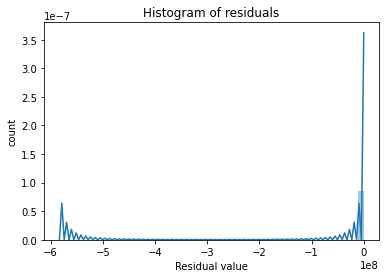

In [255]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)  

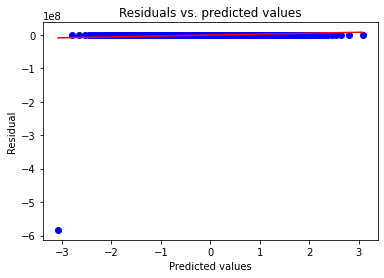

In [256]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)  

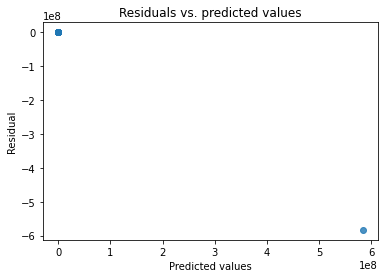

In [257]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

#### Procedemos a probar con el orden de preinscripción

In [258]:
pingfInfoFilePath = './dv_personas_190411_previo_linear_regression_grado'
dv_personas_190411_grado_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_grado_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,23,5,4.0,74d67dddf6a90800fdf40329e9dae1893a13ea312b3514...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,22,4,10.0,0e10eb72af9e98758e907e131e37cefe87830eadacbd77...,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,M,Selectividad,Ninguno,22,3,12.0,12cfa2295bc34eaf61197e1f9a141386e9ae1d8da3a945...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Selectividad,Ninguno,22,4,4.0,0902258057c0676ec136e6c44078d49aa141bfc9304fa1...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Selectividad,Ninguno,24,6,60.0,5caa652eaf2acd14fb6103ada1a0422d5aa61652abf374...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [260]:
dv_personas_190411_grado_model_one_hot = pd.get_dummies(data=dv_personas_190411_grado_model,columns=categoricalCols)

In [261]:
dv_personas_190411_grado_model_one_hot.head()

,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,tipo_acceso_COU sin selectividad,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,23,5,4.0,74d67dddf6a90800fdf40329e9dae1893a13ea312b3514...,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,22,4,10.0,0e10eb72af9e98758e907e131e37cefe87830eadacbd77...,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,22,3,12.0,12cfa2295bc34eaf61197e1f9a141386e9ae1d8da3a945...,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,22,4,4.0,0902258057c0676ec136e6c44078d49aa141bfc9304fa1...,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,24,6,60.0,5caa652eaf2acd14fb6103ada1a0422d5aa61652abf374...,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [262]:
dv_personas_190411_grado_model_one_hot.drop(['dni'],axis=1,inplace = True)

In [263]:
dv_personas_190411_grado_model_one_hot.shape

(6676, 200)

In [264]:
dv_personas_190411_grado_model_one_hot.dropna(axis = 0, inplace = True)

In [265]:
dv_personas_190411_grado_model_one_hot.shape

(5220, 200)

### Comenzamos con el segundo proceso Regresión Lineal para el tipo de titulación de Grado


In [266]:
dv_personas_190411_grado_model_one_hot_scaler = preprocessing.MinMaxScaler().fit_transform(dv_personas_190411_grado_model_one_hot)
dv_personas_190411_grado_model_one_hot_scaler = pd.DataFrame(dv_personas_190411_grado_model_one_hot_scaler,columns=dv_personas_190411_grado_model_one_hot.columns)
dv_personas_190411_grado_model_one_hot_scaler.head()

,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),...,tipo_acceso_COU sin selectividad,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,0.250000,0.363636,0.041237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.227273,0.272727,0.103093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.227273,0.181818,0.123711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.227273,0.272727,0.041237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.272727,0.454545,0.618557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [267]:
Features_1_2 = dv_personas_190411_grado_model_one_hot_scaler.iloc[:,0:2]
Features_2_2 = dv_personas_190411_grado_model_one_hot_scaler.iloc[:,3:]
labels = dv_personas_190411_grado_model_one_hot_scaler['tto_pcto_dias_trabajados']

In [268]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[0.25      , 0.36363636, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [269]:
labels = np.array(labels)
labels[:10]

array([0.04123711, 0.10309278, 0.12371134, 0.04123711, 0.6185567 ,
       0.2371134 , 0.34020619, 0.24742268, 0.45360825, 0.44329897])

In [270]:
labels.shape

(5220,)

90-10

In [271]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 522)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [272]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 1.00576896e-01  1.64597349e-01 -2.48202864e-02 -5.89175501e-02
 -3.72134976e-02  7.80190976e-02 -4.94210161e-02 -4.35839687e-02
  1.05386036e-02 -1.31532640e-01 -7.22875842e-02  2.04281823e-02
  7.29454096e-02  1.77144518e+09  8.21354598e-02  9.27797508e-02
  3.22428841e-02  3.95386990e+08 -3.15065761e-01 -1.17119131e-01
  4.44216609e+08 -2.25638226e+08 -3.94635348e-02 -2.79587258e+08
 -8.54993180e+07  3.48187632e-01 -1.29586432e-01  5.34827096e+07
  9.48976696e-03 -2.44843803e-02  1.49111016e+08  5.04587084e+07
 -7.43997200e-02  5.56661727e-03 -7.58295796e+07 -1.33262038e-01
 -8.70049877e-02  6.63373069e-02  2.66820186e-01 -1.12926391e-01
 -2.44190907e-01  3.02913732e-02  7.50841319e-03 -5.94167150e-02
  1.28796577e-01 -7.11044285e+07 -2.16739021e+07 -5.84083808e-02
  6.66890553e-02 -1.22453671e+07  1.63169778e+07  1.75350474e-01
 -3.18307707e-02 -1.50765462e+06  1.47875625e-01 -1.00723614e-02
  1.24967921e+07  5.65753725e-02  8.27527527e-02 -6.40112494e+06
  3.64703043e-02 -6.4

In [273]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)  

Mean Square Error      = 0.030864279175701424
Root Mean Square Error = 0.1756823245967033
Mean Absolute Error    = 0.1395230006045318
Median Absolute Error  = 0.124782495891925
R^2                    = 0.0353389179898258
Adjusted R^2           = -0.017385473132187766


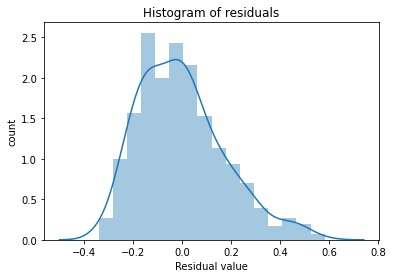

In [274]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

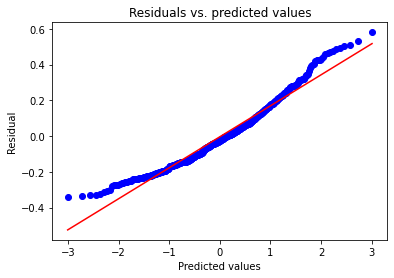

In [275]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

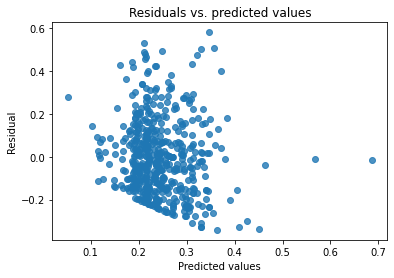

In [276]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 